In [1]:
import torch

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path
import os
import PIL
import random
from PIL import  Image
from typing import Dict,List,Tuple
from torchvision import datasets
import pandas as pd

In [4]:
#set up the data folder
data_path=Path("data/")
image_path=data_path/"pizza-steak-sushi"

#if the data not presrent then download it
if image_path.is_dir():
    print(f"the directory {image_path} already exist's")
else:
    print(f"{image_path} doesn't exist making the directory...")
    image_path.mkdir(parents=True,exist_ok=True)


the directory data\pizza-steak-sushi already exist's


In [5]:
# #lets download the data into our ditrctory
# with open(data_path/"pizza-seak-sushi.zip","wb") as f:
#     request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#     print("downloading the pizza-steak and sushi dataset")
#     f.write(request.content)

In [6]:
# #lets extract the zipped data
# with zipfile.ZipFile(data_path/"pizza-seak-sushi.zip","r") as zip_ref:
#     print("unzipping the compressed data...")
#     zip_ref.extractall(image_path)

In [7]:
data_path/"pizza-seak-sushi.zip"

WindowsPath('data/pizza-seak-sushi.zip')

In [8]:
# walk through our dataset
def walk_through(dir):
    for dirpath,dirnames,filenames in os.walk(dir):
        print(f"there are {len(dirnames)} directories and {len(filenames)} number of images in {dirpath}")

In [9]:
walk_through(image_path)

there are 2 directories and 0 number of images in data\pizza-steak-sushi
there are 3 directories and 0 number of images in data\pizza-steak-sushi\test
there are 0 directories and 25 number of images in data\pizza-steak-sushi\test\pizza
there are 0 directories and 19 number of images in data\pizza-steak-sushi\test\steak
there are 0 directories and 31 number of images in data\pizza-steak-sushi\test\sushi
there are 3 directories and 0 number of images in data\pizza-steak-sushi\train
there are 0 directories and 78 number of images in data\pizza-steak-sushi\train\pizza
there are 0 directories and 75 number of images in data\pizza-steak-sushi\train\steak
there are 0 directories and 72 number of images in data\pizza-steak-sushi\train\sushi


In [10]:
#set up the training and testing path
train_dir=image_path / "train"
test_dir=image_path / "test"

train_dir,test_dir

(WindowsPath('data/pizza-steak-sushi/train'),
 WindowsPath('data/pizza-steak-sushi/test'))

# lets visualize our data
- *we are gonna visualize our randomly selected image and display them and there labels(classes)*

In [11]:
image_path=data_path/"pizza-steak-sushi"
image_path

WindowsPath('data/pizza-steak-sushi')

### merge all our images into one list

In [12]:
#random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

#lets choose an image randomly
random_image_path=random.choice(image_path_list)
random_image_path

WindowsPath('data/pizza-steak-sushi/test/steak/894825.jpg')

### lets get our data's folder

In [13]:
image_class=random_image_path.parent.stem
image_class

'steak'

### open the image

some meta data info: image height 512 and image width 512 


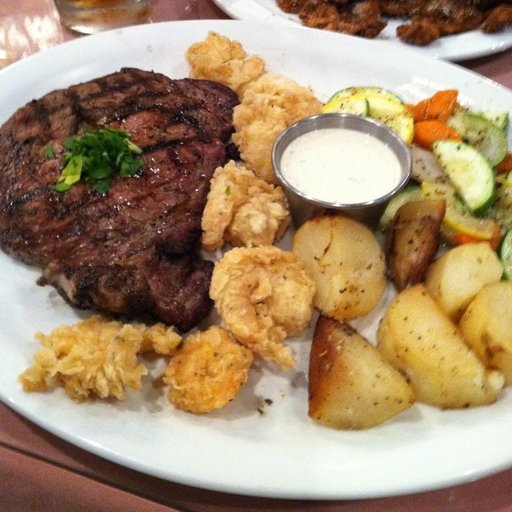

In [14]:
#lets see the image and the meta data it producess

img=Image.open(random_image_path)
img_width=img.height
img_height=img.width
print(f"some meta data info: image height {img_height} and image width {img_width} ")
img

# all in one Data Exploratory analysis

some meta data info: image height 512
 image width 408 


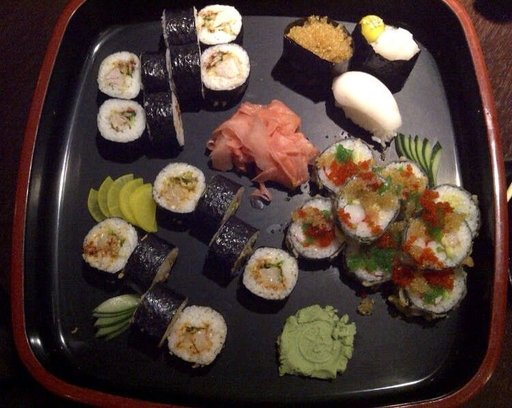

In [15]:
random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

#lets choose an image randomly
random_image_path=random.choice(image_path_list)
#random_image_path

image_class=random_image_path.parent.stem
#image_class

#lets see the image and the meta data it producess

img=Image.open(random_image_path)
img_width=img.height
img_height=img.width
print(f"some meta data info: image height {img_height}\n image width {img_width} ")
img

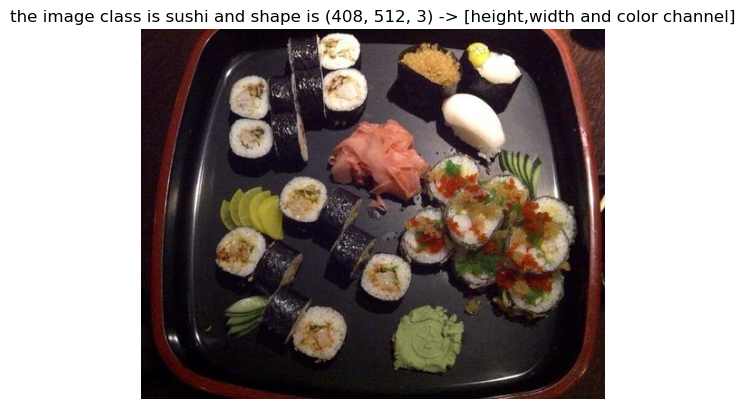

In [16]:
# visualizing with matplot lib
import matplotlib.pyplot as plt
import numpy as np

#from PIL import Image

img_array=np.array(img)
#print(repr(img))

plt.imshow(img_array)
plt.title(f"the image class is {image_class} and shape is {img_array.shape} -> [height,width and color channel]")
plt.axis(False);

# Transforming data into tensor's

In [17]:
#lets transofrorm the data
from torch.utils.data import DataLoader
from torchvision import transforms,datasets
from torchvision.transforms import ToTensor

In [18]:
data_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),  #flip 50% of the incomming data
    transforms.ToTensor()
])

In [19]:
data_transform(img).shape

torch.Size([3, 64, 64])

# lets view before and after the transformation of our dataset

In [20]:
def view_transform(file_path:list,
                   transform,n,seed=42
                  ):
 
    torch.manual_seed(seed)
    np.random.seed(seed)
    random_sample=random.sample(file_path,k=n)
    for image_path in random_sample:
        with Image.open(image_path) as f:
            fig,ax=plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original:\nsize-{f.size}")
            ax[0].axis("off")
            #pl.imshow(f)
            #the transformed image is
            transformed_img=transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"transformed size:\n {transformed_img.shape}")
            ax[1].axis("off")
            fig.suptitle(f"class: {image_path.parent.stem}",fontsize=16)

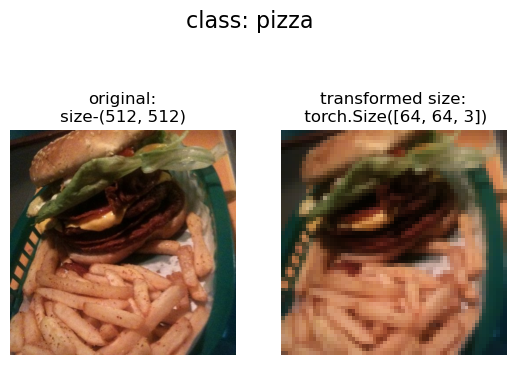

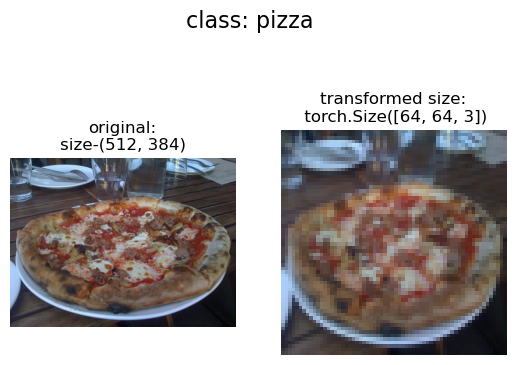

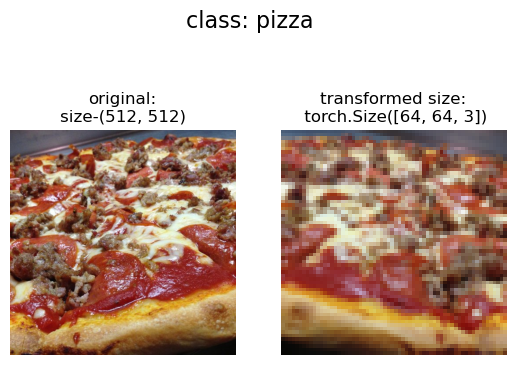

In [21]:
view_transform(
    file_path=image_path_list,
    transform=data_transform,
    n=3,
#    seed=None
)


# lets load the dataset

In [22]:
from torchvision import datasets

train_data=datasets.ImageFolder(root=train_dir,
                               transform=data_transform,
                               target_transform=None,
                        )

In [23]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza-steak-sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [24]:
test_data=datasets.ImageFolder(root=test_dir,
                              transform=data_transform,
                              target_transform=None)

In [25]:
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza-steak-sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [26]:
len(train_data),len(test_data)

(225, 75)

In [27]:
#this are the class names
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [28]:
#get the class to idx
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [29]:
len(train_data),len(test_data)

(225, 75)

In [30]:
image,label=train_data[100][0],train_data[100][1]
print(image)

tensor([[[0.9804, 0.9725, 0.9490,  ..., 0.8824, 0.8784, 0.8824],
         [0.9725, 0.9569, 0.9294,  ..., 0.8784, 0.8824, 0.8863],
         [0.9608, 0.9451, 0.9294,  ..., 0.8824, 0.8863, 0.8824],
         ...,
         [0.6627, 0.6588, 0.6588,  ..., 0.6588, 0.6627, 0.6706],
         [0.6980, 0.6627, 0.6627,  ..., 0.6588, 0.6627, 0.6667],
         [0.8039, 0.7020, 0.6667,  ..., 0.6588, 0.6549, 0.6706]],

        [[0.8118, 0.8000, 0.7569,  ..., 0.7686, 0.7725, 0.7765],
         [0.8039, 0.7843, 0.7490,  ..., 0.7686, 0.7686, 0.7725],
         [0.8000, 0.7765, 0.7529,  ..., 0.7686, 0.7686, 0.7686],
         ...,
         [0.5255, 0.5255, 0.5294,  ..., 0.5608, 0.5608, 0.5608],
         [0.5608, 0.5333, 0.5333,  ..., 0.5608, 0.5608, 0.5608],
         [0.6706, 0.5725, 0.5333,  ..., 0.5608, 0.5608, 0.5686]],

        [[0.6471, 0.6431, 0.6118,  ..., 0.6980, 0.7020, 0.6980],
         [0.6471, 0.6235, 0.6039,  ..., 0.6980, 0.7020, 0.7020],
         [0.6549, 0.6275, 0.6078,  ..., 0.6863, 0.6980, 0.

In [31]:
image.shape,label

(torch.Size([3, 64, 64]), 1)

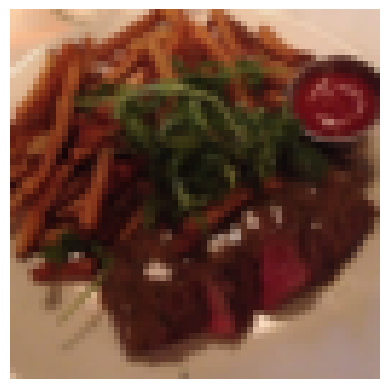

In [32]:
#lets change the shape of the image 
image_permute=image.permute(1,2,0)

plt.imshow(image_permute);
#plt.label(f"change from {image.shape} -> {image_permute.shape} ")
plt.axis("OFF");

# dataset into dataloader

In [33]:
batch_size=1
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1
)

In [34]:
len(train_dataloader),len(test_dataloader)

(225, 75)

In [35]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x284f028f6a0>,
 <torch.utils.data.dataloader.DataLoader at 0x284f028f700>)

In [36]:
#lets check out the shape of the image
image,label=next(iter(train_dataloader))
#image.shape,label.shape
print(f"the shape is {image.shape} ==> [batch_size,color channels,height and width]")
print(f"label shape is {label.shape} ")

the shape is torch.Size([1, 3, 64, 64]) ==> [batch_size,color channels,height and width]
label shape is torch.Size([1]) 


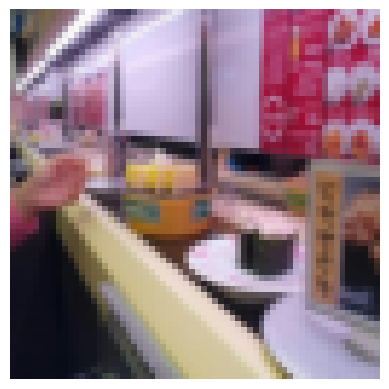

In [37]:
#in this case the batch size is "1"
 
permute_img=image[0].permute(1,2,0)
#label=label.argmax(dim=1)
#print(label)
plt.imshow(permute_img);
plt.axis("OFF");

# **creating our own local imagefolder with custom dataset**

* the objective is building local imagefolder from torch

In [38]:
train_dir

WindowsPath('data/pizza-steak-sushi/train')

In [39]:
list(os.scandir(train_dir))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [40]:
#this is the draft veriosn
def my_find_classes(directory):
    """
        finds the class folder names in a target directory
    """
    class_names={}
    list_dir=[]
    counter=0
    for entry in list(os.scandir(directory)):
        list_dir.append(entry.name)
        class_names[entry.name]=counter
        counter+=1
    return class_names

In [41]:
#cleaner code
def find_classes(directory:str)->Tuple[List[str],Dict[str,int]]:
    """ scanns the directory and then fins the class names and there values """
    #finds the class names
    class_names=[entry.name for entry in os.scandir(directory) if entry.is_dir()]

    #if there is no class names
    if not class_names:
        raise FileNotFoundError(f"couldn't find any class in {direcrory}")
        
    #finds the dictionary
    class_dict={name:id for id,name in enumerate(class_names)}
    return class_names,class_dict

In [42]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [43]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [44]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [45]:
#from pathlib import Path
import pathlib

In [46]:
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
    """my version of custom Dataset"""
    #super().__init__()
    def __init__(self,target_path:str,
                 transform=None
                ):
        self.paths=list(pathlib.Path(target_path).glob("*/*.jpg"))   #list of all files that end with the "jpg" inside the directory
        self.transform=transform
    
        self.class_names,self.class_idx=find_classes(target_path)
    
    def load_images(self,index:int)->Image.Image:
        return Image.open(self.paths[index])
    
    def __len__(self)->int:
        """return the total amount of data we have"""
        return len(self.paths)
    
    def __getitem__(self,index:int)->Tuple[torch.Tensor,int]:
        
        """ gets one sample of data"""
        image=self.load_images(index)
        class_name=self.paths[index].parent.name
        class_idx=self.class_idx[class_name]
        if self.transform:
            return self.transform(image),class_idx
        else:
            return image,class_idx

In [47]:
print(ImageFolderCustom(train_dir,transform=data_transform))

In [48]:
from torchvision import transforms

train_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [49]:
train_dir,test_dir

(WindowsPath('data/pizza-steak-sushi/train'),
 WindowsPath('data/pizza-steak-sushi/test'))

In [50]:
train_data_custom=ImageFolderCustom(
    target_path=train_dir,
    transform=train_transform
)
test_data_custom=ImageFolderCustom(
    target_path=test_dir,
    transform=test_transform
)

In [51]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x284f0639f70>,
 <__main__.ImageFolderCustom at 0x284f06395b0>)

In [52]:
len(train_data),len(train_data_custom)

(225, 225)

In [53]:
len(test_data),len(test_data_custom)

(75, 75)

In [54]:
custom_class=train_data_custom.class_names
custom_class

['pizza', 'steak', 'sushi']

In [55]:
train_data_custom.class_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [56]:
# lets check between cusotm and builtint
print(train_data_custom.class_names==train_data.classes)
print(test_data_custom.class_names==test_data.classes)

True
True


# lets visualize our custom loaded dataset

In [57]:
def visualize_random_images(dataset:torch.utils.data,
                     classes:List[str]=None,
                     n:int=10,
                     display_shapes:bool=True,
                     seed:int=42
                    ):
    #check for element displayed
    if n>10:
        n=10
        print(f"the element chosen is more than expexted...")
        display_shapes=False
    
    #csetting value of seed
    torch.manual_seed(seed)
    
    #lets set up the plto
    plt.figure(figsize=(16,10))
    
    random_selected=random.sample(range(len(dataset)),k=n)
    #lets plot the images
    for i,target_sample in enumerate(random_selected):
        
        image,label=dataset[target_sample][0],dataset[target_sample][1]
        image_resized=image.permute(1,2,0)
        
        plt.subplot(1,n,i+1)
        plt.imshow(image_resized)
        plt.axis("OFF")
        
        if classes:
            title=f"class: {classes[label]}"
            if display_shapes:
                title=title+f"\nshapes: {image_resized.shape}"
        plt.title(title)

In [58]:
train_data.classes

['pizza', 'steak', 'sushi']

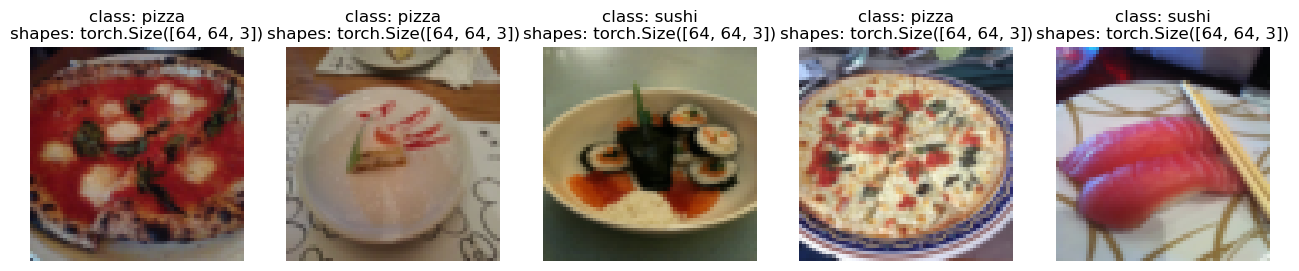

In [59]:
#check on the torch's generated dataset
visualize_random_images(dataset=train_data,
                       classes=train_data.classes,
                        n=5,
                        display_shapes=True
                       )

In [60]:
random.sample(range(len(train_data)),k=10)

[189, 139, 22, 151, 108, 8, 7, 23, 55, 59]

the element chosen is more than expexted...


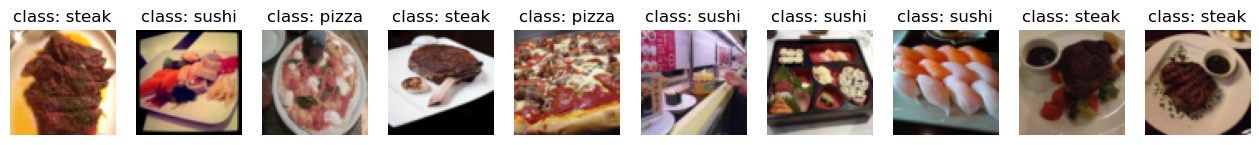

In [61]:
#display random images 
visualize_random_images(dataset=train_data_custom,
                       classes=custom_class,
                       n=20,
                       display_shapes=True,
                       seed=42)

# lets load our custom dataset into dataloader

In [62]:
from torch.utils.data import DataLoader
batch_size=32

train_custom_loader=DataLoader(
    dataset=train_data_custom,
    batch_size=batch_size,
  #  num_workers=os.cpu.count(),
#    num_workers=1
    shuffle=True
)
test_custom_loader=DataLoader(
    dataset=test_data_custom,
    batch_size=batch_size,
   #num_workers=os.cpu.count(),
#  num_workers=1
    shuffle=False
)

In [63]:
print(train_custom_loader)
print(test_custom_loader)

In [64]:
print(len(train_custom_loader))
print(len(test_custom_loader))

8
3


In [65]:
#get the image and label
image_custom,label_custom=next(iter(train_custom_loader))
image_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# data augmentation... other forms of transform


In [66]:
from torchvision import transforms
train_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [67]:
train_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ToTensor()
)

In [68]:
test_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)

In [69]:
image_path

WindowsPath('data/pizza-steak-sushi')

In [70]:
len(image_path_list)

300

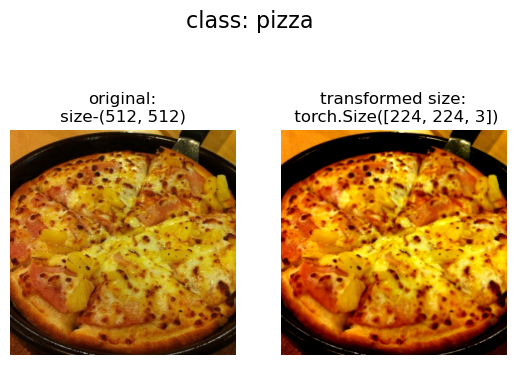

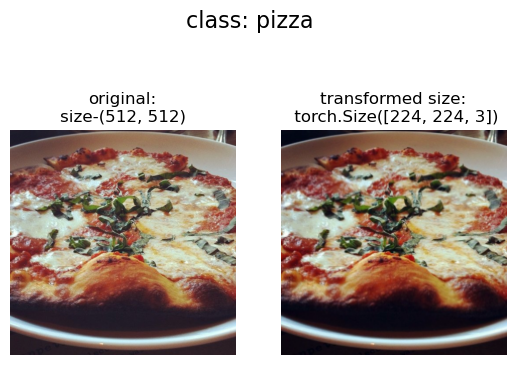

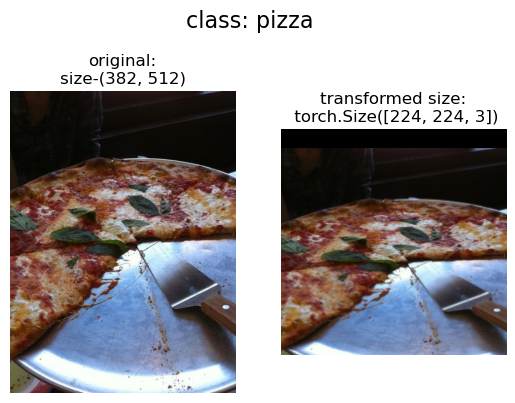

In [71]:
#displaying images that have been augmented
view_transform(image_path_list[:10],train_transform,n=3)

# lets build a base model **tiny VGG**
-note:- this won't include a data augmentation


In [72]:
train_dir,test_dir

(WindowsPath('data/pizza-steak-sushi/train'),
 WindowsPath('data/pizza-steak-sushi/test'))

In [73]:
simple_transform=transforms.Compose([
        transforms.Resize(size=(64,64)),
        transforms.ToTensor()
])

train_data_sample=datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)
test_data_sample=datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform
)

In [74]:
train_data_sample

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza-steak-sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [75]:
test_data_sample

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza-steak-sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [76]:
#make it into dataloader
batch_size=32

train_data_loader=DataLoader(
    dataset=train_data_sample,
    batch_size=batch_size,
    shuffle=True
)

test_data_loader=DataLoader(
    dataset=test_data_sample,
    batch_size=batch_size,
    shuffle=False
)

In [77]:
len(train_data_loader),len(test_data_loader)

(8, 3)

## ** building the tiny VGG model**

In [78]:
device

'cpu'

In [79]:
import torch.nn as nn
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class tinyVGG_base(nn.Module):
    
    def __init__(self,input_shape:int,
                hidden_layer:int,
                output_shape:int):
        super().__init__()
     
        self.block_1=nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_layer,
            kernel_size=3,
            stride=2,
            padding=0
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                              out_channels=hidden_layer,
                              kernel_size=3,
                              stride=1,
                              padding=0),
       nn.ReLU(),
       nn.MaxPool2d(
           kernel_size=2,
           stride=1,
           padding=0
       )
        )

        #second block
        
        self.block_2=nn.Sequential(

        nn.Conv2d(
            in_channels=hidden_layer,
            out_channels=hidden_layer,
            kernel_size=3,
            stride=1,
            padding=0
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                              out_channels=hidden_layer,
                              kernel_size=2,
                              stride=1,
                              padding=0),
       nn.ReLU(),
       nn.MaxPool2d(
           kernel_size=3,
           stride=2,
           padding=0
       )
        )
    #this is basically the last layer
        self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layer*12*12,
                 out_features=output_shape)
    )
        
    def forward(self,x:torch.Tensor):
  #      print(f"initial shape is {x.shape} ")
        x=self.block_1(x)
   #     print(f"after the first block  {x.shape}")
        x=self.block_2(x)
    #    print(f"shape after the second block is {x.shape}")
        x=self.classifier(x)
     #   print(f"shape last layer {x.shape} ")
        return x

In [80]:
class_names

['pizza', 'steak', 'sushi']

In [81]:
model_0=tinyVGG_base(input_shape=3,
                    hidden_layer=10,
                    output_shape=len(class_names)).to(device)

In [82]:
model_0.state_dict

<bound method Module.state_dict of tinyVGG_base(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1440, out_features=3, bias=True)
  )
)>

### **lets check out the model through simple data**:


In [83]:
try:
    from torchinfo import summary
except:
    !pip install torchinfo
    from torchinfo import summary

In [84]:
image_batch,label_batch=next(iter(train_data_loader))
print(f"length: {len(image_batch),len(label_batch)}")
print(f"shpae is {image_batch.shape} and {label_batch.shape} ")

length: (32, 32)
shpae is torch.Size([32, 3, 64, 64]) and torch.Size([32]) 


In [85]:
58*58*10

33640

In [86]:
model_0.eval()
with torch.inference_mode():
    print(model_0(image_batch))

tensor([[ 0.0801,  0.0381, -0.0448],
        [ 0.0787,  0.0366, -0.0438],
        [ 0.0798,  0.0373, -0.0445],
        [ 0.0805,  0.0382, -0.0443],
        [ 0.0775,  0.0371, -0.0414],
        [ 0.0795,  0.0352, -0.0443],
        [ 0.0782,  0.0362, -0.0438],
        [ 0.0796,  0.0374, -0.0447],
        [ 0.0772,  0.0371, -0.0419],
        [ 0.0775,  0.0361, -0.0444],
        [ 0.0774,  0.0353, -0.0430],
        [ 0.0791,  0.0370, -0.0440],
        [ 0.0764,  0.0360, -0.0427],
        [ 0.0783,  0.0367, -0.0429],
        [ 0.0803,  0.0382, -0.0437],
        [ 0.0781,  0.0366, -0.0428],
        [ 0.0793,  0.0379, -0.0441],
        [ 0.0790,  0.0366, -0.0437],
        [ 0.0799,  0.0375, -0.0454],
        [ 0.0781,  0.0358, -0.0436],
        [ 0.0769,  0.0351, -0.0425],
        [ 0.0809,  0.0384, -0.0452],
        [ 0.0783,  0.0370, -0.0431],
        [ 0.0760,  0.0348, -0.0429],
        [ 0.0787,  0.0368, -0.0436],
        [ 0.0797,  0.0378, -0.0446],
        [ 0.0774,  0.0358, -0.0436],
 

# for checking our models Architecture

In [87]:
from torchinfo import summary

summary(model_0,input_data=image_batch)

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG_base                             [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 28, 28]          --
│    └─Conv2d: 2-1                       [32, 10, 31, 31]          280
│    └─ReLU: 2-2                         [32, 10, 31, 31]          --
│    └─Conv2d: 2-3                       [32, 10, 29, 29]          910
│    └─ReLU: 2-4                         [32, 10, 29, 29]          --
│    └─MaxPool2d: 2-5                    [32, 10, 28, 28]          --
├─Sequential: 1-2                        [32, 10, 12, 12]          --
│    └─Conv2d: 2-6                       [32, 10, 26, 26]          910
│    └─ReLU: 2-7                         [32, 10, 26, 26]          --
│    └─Conv2d: 2-8                       [32, 10, 25, 25]          410
│    └─ReLU: 2-9                         [32, 10, 25, 25]          --
│    └─MaxPool2d: 2-10                   [32, 10, 12, 12]          --
├─Sequentia

In [88]:
summary(model_0,input_size=(batch_size,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG_base                             [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 28, 28]          --
│    └─Conv2d: 2-1                       [32, 10, 31, 31]          280
│    └─ReLU: 2-2                         [32, 10, 31, 31]          --
│    └─Conv2d: 2-3                       [32, 10, 29, 29]          910
│    └─ReLU: 2-4                         [32, 10, 29, 29]          --
│    └─MaxPool2d: 2-5                    [32, 10, 28, 28]          --
├─Sequential: 1-2                        [32, 10, 12, 12]          --
│    └─Conv2d: 2-6                       [32, 10, 26, 26]          910
│    └─ReLU: 2-7                         [32, 10, 26, 26]          --
│    └─Conv2d: 2-8                       [32, 10, 25, 25]          410
│    └─ReLU: 2-9                         [32, 10, 25, 25]          --
│    └─MaxPool2d: 2-10                   [32, 10, 12, 12]          --
├─Sequentia

# lets train our model

In [89]:
torch.utils.data.DataLoader

torch.utils.data.dataloader.DataLoader

In [90]:
image,label = next(iter(train_data_loader))
print(len(image),len(label))

32 32


In [91]:
def train_step(
    model:nn.Module,
    train_data:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    device:torch.device="cpu"
):
    
    train_loss=0 #this is accumulated loss
    train_acc=0
   
    model.train()
    for batch,(train_image,train_label) in enumerate(train_data): 
        train_image,train_label=train_image.to(device),train_label.to(device)
    
        y_pred_logits=model(train_image)   #used for calculating the loss
        y_pred=torch.softmax(y_pred_logits,dim=1).argmax(dim=1)
        #save the training loss per epoch
        loss=loss_fn(y_pred_logits,train_label)
        train_loss+=loss.item()  #for calcuaint the loss and saving the loss for visual purposes

        #lets zero the accumulated gradient
        optimizer.zero_grad()
        #lets backpropagate
        loss.backward()
        #lets updata the parameter
        optimizer.step()
        #save/calculate model's accuracy
        train_acc=(y_pred==train_label).sum().item()/len(y_pred)

    #the final loss and accuracy
    train_loss/=len(train_data)  #which dividing the train loss by the batch size
    train_acc/=len(train_data)
    return train_loss,train_acc

def test_step(
    model:nn.Module,
    test_data:torch.utils.data.DataLoader,
    loss_fn:torch.nn,
    device:torch.device="cpu"
):
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        
        for batch,(eval_image,eval_label) in enumerate(test_data):
            y_pred_logits=model(eval_image)
            y_pred=torch.argmax(torch.softmax(y_pred_logits,dim=1),dim=1)
            loss=loss_fn(y_pred_logits,eval_label)
       
            test_loss+=loss.item()
            test_acc+=(y_pred==eval_label).sum().item()/len(y_pred)
        test_loss/=len(test_data)
        test_acc/=len(test_data)
    return test_loss,test_acc

# all in one function....train_step... and....test_step

In [92]:
from tqdm.auto import tqdm

def train_model(model:nn.Module,
                train_data:torch.utils.data.DataLoader,
                test_data:torch.utils.data.DataLoader,
                loss_fn:nn.Module,
                optimizer:torch.optim.Optimizer,
                epochs:int,
                device:torch.device=device
               ):
    """a fucntion that trains our model and evaluates it"""
    results={
        "train_loss":[],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]
    }
    train_loss,train_acc=0,0
    test_loss,test_acc=0,0
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc=train_step(
            model=model,
            train_data=train_data,
            loss_fn=loss_fn,
            optimizer=optimizer,
            device=device
        )
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)

        #evaluation time
        test_loss,test_acc=test_step(
            model=model,
            test_data=test_data,
            loss_fn=loss_fn,
            device=device
        )
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        print(f" epoch {epoch} | train loss {train_loss:.4f} | train acc {train_acc:.4f} | test loss {test_loss:.4f} | test acc {test_acc:.4f}")
        
    return results

C:\Users\nebiy\miniconda3\envs\snakey\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
from timeit import default_timer as timer

start_time=timer()
# lets train our model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0=tinyVGG_base(
    input_shape=3,  #this is the number of color channels
    hidden_layer=10,
    output_shape=len(class_names)
).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),
                          lr=0.01)
num_epochs=5

model_0_results=train_model(model=model_0,
           train_data=train_data_loader,
           test_data=test_data_loader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           epochs=num_epochs,
           device=device)
end_time=timer()
time_needed=end_time-start_time

print(f"the total amount of time taken to train the model is {time_needed:.3f}")

 20%|████████████████▊                                                                   | 1/5 [00:03<00:14,  3.53s/it]

 epoch 0 | train loss 1.1159 | train acc 0.0000 | test loss 1.0556 | test acc 0.5417


 40%|█████████████████████████████████▌                                                  | 2/5 [00:06<00:08,  3.00s/it]

 epoch 1 | train loss 1.0997 | train acc 0.1250 | test loss 1.0434 | test acc 0.5417


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:08<00:05,  2.84s/it]

 epoch 2 | train loss 1.1199 | train acc 0.0000 | test loss 1.0677 | test acc 0.5417


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:11<00:02,  2.76s/it]

 epoch 3 | train loss 1.1053 | train acc 0.0000 | test loss 1.1009 | test acc 0.2604


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.80s/it]

 epoch 4 | train loss 1.0887 | train acc 0.1250 | test loss 1.1115 | test acc 0.2604
the total amount of time taken to train the model is 14.038


In [94]:
train_data_loader,test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x284f09bc370>,
 <torch.utils.data.dataloader.DataLoader at 0x284f09bc3d0>)

In [95]:
loss=nn.CrossEntropyLoss
loss

torch.nn.modules.loss.CrossEntropyLoss

In [97]:
model_0_results

{'train_loss': [1.115947812795639,
  1.0997083634138107,
  1.119913637638092,
  1.1052656173706055,
  1.0886895582079887],
 'train_acc': [0.0, 0.125, 0.0, 0.0, 0.125],
 'test_loss': [1.0555936495463054,
  1.0434176524480183,
  1.0676841537157695,
  1.1008919874827068,
  1.1115171909332275],
 'test_acc': [0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.2604166666666667,
  0.2604166666666667]}

In [99]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [100]:
def plot_result(result:Dict[str,List[float]]):
    
    epochs=range(len(result["train_loss"]))

    plt.figure(figsize=(17,5))
    
    plt.subplot(1,2,1)
    plt.plot(epochs,result["train_loss"],label="train_loss")
    plt.plot(epochs,result["test_loss"],label="test_loss")
    plt.legend()
    plt.title("loss")
  #  plt.ylabel("train")

    plt.subplot(1,2,2)
    plt.plot(epochs,result["train_acc"],label="train_Accuracy")
    plt.plot(epochs,result["test_acc"],label="test_Accuracy")
    plt.title("accuracy")
    plt.legend()

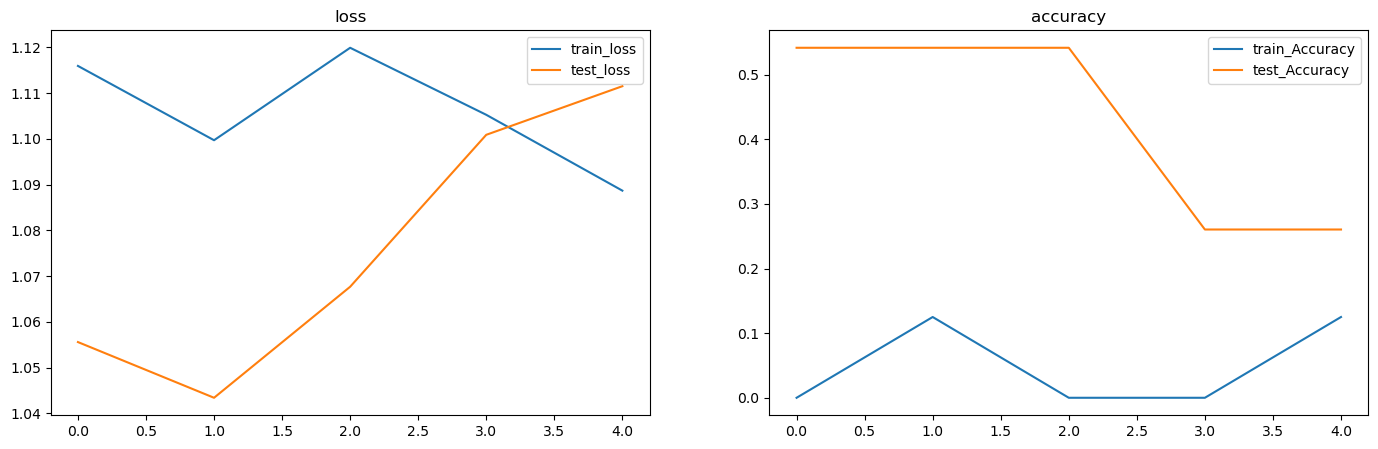

In [102]:
plot_result(model_0_results)

# lets do some  data augementation
* same model

In [103]:
from torchvision import transforms

train_augment_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])



In [104]:
from torchvision.datasets import ImageFolder
#turn the data into dataset format
train_augment_dataset=ImageFolder(
    root=train_dir,
    transform=train_augment_transform,
)
test_dataset=ImageFolder(
    root=test_dir,
    transform=test_transform
)

In [105]:
train_augment_dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza-steak-sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

In [106]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza-steak-sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [107]:
#data loader
from torch.utils.data import DataLoader
batch_size=32

train_augmented_loader=DataLoader(
    train_augment_dataset,
    shuffle=True,
    batch_size=batch_size
)

test_loader=DataLoader(
    test_dataset,
    shuffle=False,
    batch_size=batch_size
)

In [108]:
train_augmented_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x284f0392850>,
 <torch.utils.data.dataloader.DataLoader at 0x284f0392550>)

In [109]:
len(train_augmented_loader),len(test_loader)

(8, 3)

# lets train the mode with augmneted data
**same model**

In [110]:
train_augment_dataset.classes

['pizza', 'steak', 'sushi']

In [111]:
model_v1=tinyVGG_base(input_shape=3,
                     hidden_layer=10,  #this is the number of layer
                      output_shape=len(train_augment_dataset.classes)
                     )

In [112]:
model_v1.state_dict

<bound method Module.state_dict of tinyVGG_base(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1440, out_features=3, bias=True)
  )
)>

In [113]:
summary(model_v1,input_size=(batch_size,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG_base                             [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 28, 28]          --
│    └─Conv2d: 2-1                       [32, 10, 31, 31]          280
│    └─ReLU: 2-2                         [32, 10, 31, 31]          --
│    └─Conv2d: 2-3                       [32, 10, 29, 29]          910
│    └─ReLU: 2-4                         [32, 10, 29, 29]          --
│    └─MaxPool2d: 2-5                    [32, 10, 28, 28]          --
├─Sequential: 1-2                        [32, 10, 12, 12]          --
│    └─Conv2d: 2-6                       [32, 10, 26, 26]          910
│    └─ReLU: 2-7                         [32, 10, 26, 26]          --
│    └─Conv2d: 2-8                       [32, 10, 25, 25]          410
│    └─ReLU: 2-9                         [32, 10, 25, 25]          --
│    └─MaxPool2d: 2-10                   [32, 10, 12, 12]          --
├─Sequentia

In [114]:
from timeit import default_timer as timer

start_time=timer()
# lets train our model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),
                          lr=0.1)
num_epochs=5

model_v1_results=train_model(model=model_v1,
           train_data=train_augmented_loader,
           test_data=test_loader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           epochs=num_epochs,
           device=device)
end_time=timer()
time_needed=end_time-start_time

print(f"the total amount of time taken to train the model is {time_needed:.3f}")

 20%|████████████████▊                                                                   | 1/5 [00:03<00:12,  3.09s/it]

 epoch 0 | train loss 1.1061 | train acc 0.0000 | test loss 1.0962 | test acc 0.1979


 40%|█████████████████████████████████▌                                                  | 2/5 [00:06<00:09,  3.04s/it]

 epoch 1 | train loss 1.1049 | train acc 0.0000 | test loss 1.0962 | test acc 0.1979


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:08<00:05,  2.97s/it]

 epoch 2 | train loss 1.0977 | train acc 0.0000 | test loss 1.0962 | test acc 0.1979


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:11<00:02,  2.91s/it]

 epoch 3 | train loss 1.1061 | train acc 0.0000 | test loss 1.0962 | test acc 0.1979


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.93s/it]

 epoch 4 | train loss 1.0979 | train acc 0.0000 | test loss 1.0962 | test acc 0.1979
the total amount of time taken to train the model is 14.683


# lets visualize the result of the model trained with augmented data

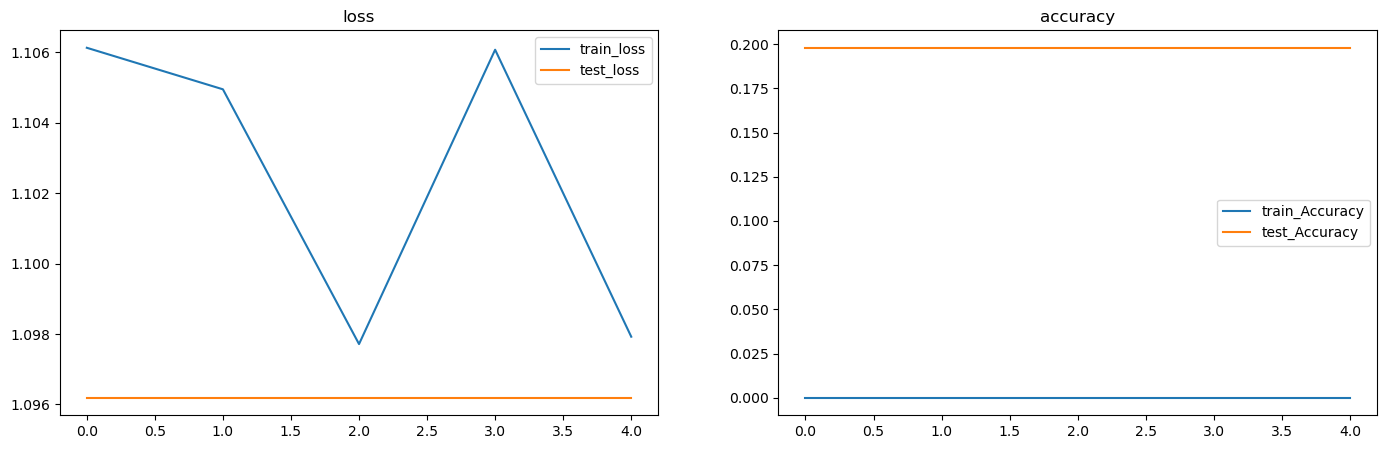

In [115]:
plot_result(model_v1_results)

# lets visualize our  models

In [116]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [117]:
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_v1_results)

In [118]:
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.115948      0.000   1.055594  0.541667
1    1.099708      0.125   1.043418  0.541667
2    1.119914      0.000   1.067684  0.541667
3    1.105266      0.000   1.100892  0.260417
4    1.088690      0.125   1.111517  0.260417

In [119]:
model_1_df

train_loss  train_acc  test_loss  test_acc
0    1.106127        0.0    1.09619  0.197917
1    1.104948        0.0    1.09619  0.197917
2    1.097714        0.0    1.09619  0.197917
3    1.106072        0.0    1.09619  0.197917
4    1.097923        0.0    1.09619  0.197917

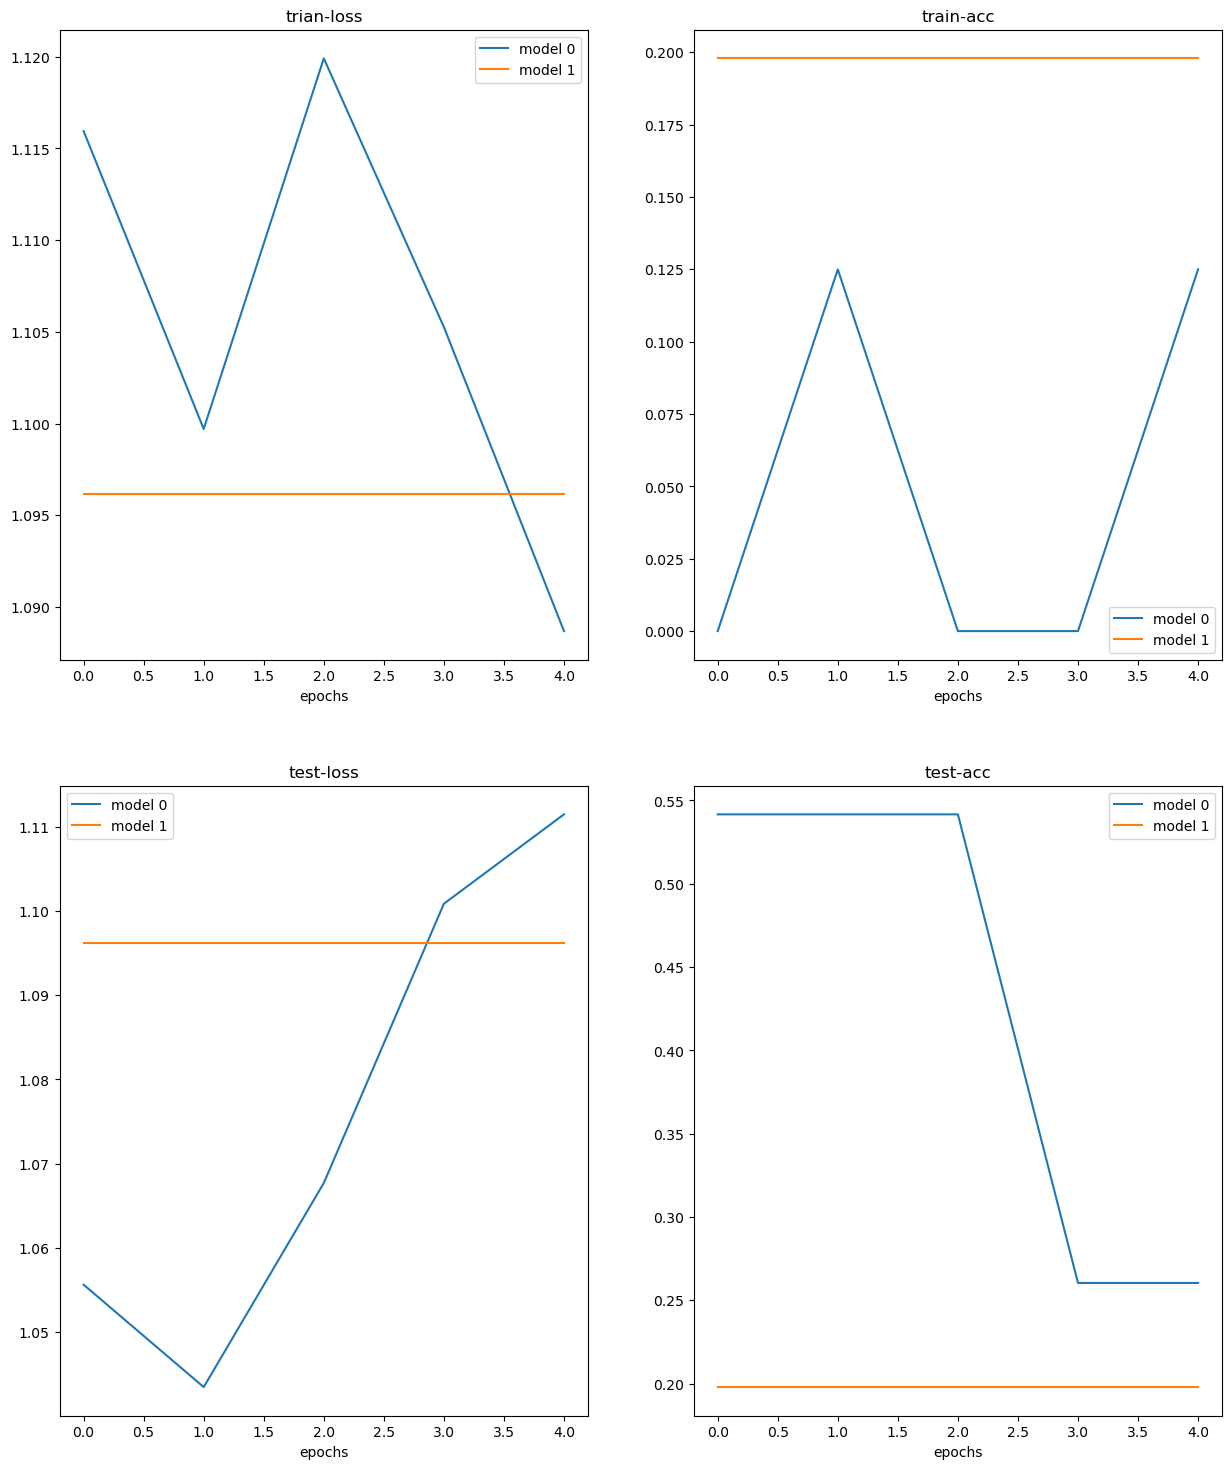

In [120]:
plt.figure(figsize=(15,18))

epochs = range(len(model_0_df))
plt.subplot(2,2,1)

#this show the train loss
plt.plot(epochs, model_0_df["train_loss"], label="model 0")
plt.plot(epochs, model_1_df["test_loss"], label="model 1")
plt.xlabel("epochs")
plt.title("trian-loss")
plt.legend()

#this shows the train accuracy
plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["train_acc"],label="model 0")
plt.plot(epochs,model_1_df["test_acc"],label="model 1")
plt.xlabel("epochs")
plt.title("train-acc")
plt.legend()

#htis shows the test loss
plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["test_loss"],label="model 0")
plt.plot(epochs,model_1_df["test_loss"],label="model 1")
plt.xlabel("epochs")
plt.title("test-loss")
plt.legend()

#this shows the test 
plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"],label="model 0")
plt.plot(epochs,model_1_df["test_acc"],label="model 1")
plt.xlabel("epochs")
plt.title("test-acc")
plt.legend();

# making prediction on custom dataset

In [121]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data\04-pizza-dad.jpeg already exists, skipping download.


In [122]:
from torchvision.io import read_image 
#lets load the image and preprocess it the same way as the one we trained on
custom_image_loaded=read_image(str(custom_image_path))
custom_image_loaded.shape

torch.Size([3, 4032, 3024])

In [123]:
custom_image_loaded.dtype

torch.uint8

In [131]:
#need to put the image into the device
custom_image_loaded=custom_image_loaded.to(device)
custom_image_loaded.device

device(type='cpu')

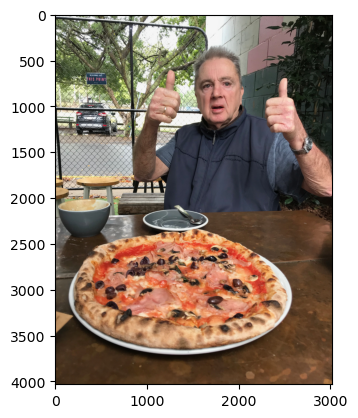

In [143]:
plt.imshow(custom_image_loaded.permute(1,2,0))

# before loading our image into the model we need to make sure:
    *the image is resized into (64*64)
    *the image is on the same device as the model
    *the image is should be a tensor and of  type float32
    *and normalize it from (0-255) into (0-1)
    note: 
    *our model was trained on batches of data so dont forget the batch dimension

In [161]:
from torchvision.io import read_image
from torchvision import transforms
#change it into correct datatype and value
image_load=read_image(str(custom_image_path)).to(torch.float32)/255
print(f"the image data type has changed into {image_load.dtype}")

#know lets try to change its shape
transformer=transforms.Compose([
    transforms.Resize(size=(64,64))
])
custom_image_transformed=transformer(image_load).to(device)
print(f"the image content has been normalized and reshaped into: {custom_image_transformed.shape} ")

the image data type has changed into torch.float32
the image content has been normalized and reshaped into: torch.Size([3, 64, 64]) 


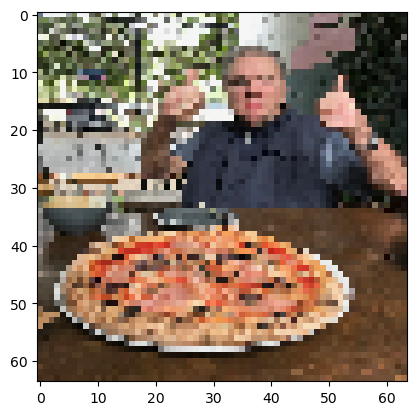

In [162]:
plt.imshow(custom_image_transformed.permute(1,2,0))

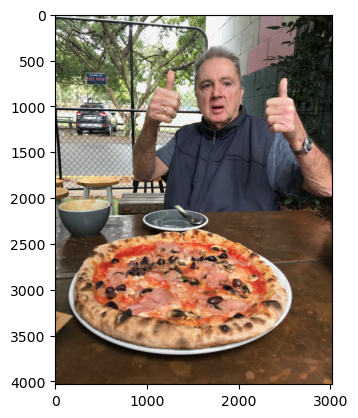

In [163]:
plt.imshow(image_load.permute(1,2,0))

In [179]:
model_v1.eval()
with torch.inference_mode():
    model_pred_custom=model_v1(custom_image_transformed.unsqueeze(dim=0))
    
print(torch.argmax(torch.softmax(model_pred_custom,dim=1),dim=1).item())
print(model_pred_custom)

1
tensor([[-0.0568,  0.0245,  0.0042]])


In [177]:
class_names[1]

'steak'

In [202]:
torch.softmax(model_pred_custom,dim=1)

tensor([[0.3177, 0.3446, 0.3377]])

In [182]:
class_names

['pizza', 'steak', 'sushi']

In [236]:
def make_prediction(
    model:nn.Module,
    dir:str,
    class_names:List[str],
    transform:None,
    device:torch.device=device
):
    
    loaded_image=read_image(str(dir)).type(torch.float32)/255  #load and normalize
    loaded_image_transform=transform(loaded_image).to(device)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        image_pred_logits=model(loaded_image_transform.unsqueeze(dim=0).to(device)) #we need to make sure that the image and the model are on the same device
    image_label_pred=torch.argmax(torch.softmax(image_pred_logits,dim=1),dim=1)
    pred_label=class_names[image_label_pred]
    title=f"pred: {pred_label} | pred prob {torch.softmax(image_pred_logits,dim=1).max().cpu():.2f} "
    plt.imshow(loaded_image_transform.squeeze().permute(1,2,0))
    plt.title(title)
    plt.axis("off");

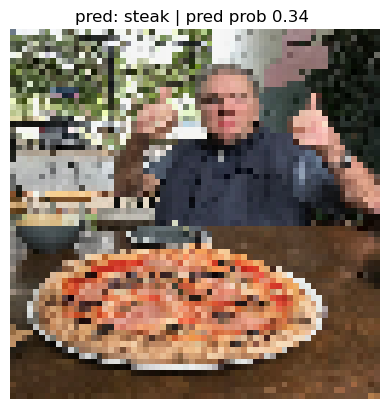

In [237]:
make_prediction(model=model_v1,dir=custom_image_path,class_names=class_names,transform=transformer,device=device)